In [1]:
# Import all the libraries used in the program
import numpy as np
import matplotlib.pyplot as plt
from time import time
from scipy.optimize import curve_fit
from scipy.integrate import quad

In [2]:
def initialise(initial_conditions):

    '''
    PURPOSE:
            Function to initialise the position and velocity vectors.

    INPUTS:
            N/A

    OUTPUTS:
            [r, v; np.array, float]:  Position and velocity vectors of the Star.
    '''

    # Unpack initial conditions
    ixp = initial_conditions['ixp']
    iyp = initial_conditions['iyp']
    izp = initial_conditions['izp']
    ivx = initial_conditions['ivx']
    ivy = initial_conditions['ivy']
    ivz = initial_conditions['ivz']
    e = initial_conditions['e']

    # Initial position of the star at apehelion
    r = np.array([ixp, iyp, izp]) 

    # Initial velocity of the star
    v = np.array([ivx, ivy, ivz])

    return r, v

In [3]:
def computeAcc(r, r_mag):

    '''
    PURPOSE:
            Function to accept the current position of the star and returns the acceleration due to a dark halo potential.

   INPUTS:
            [r; np.array, float]:  Magnitude of the position vector.

    OUTPUTS:
             [a; float]:  Acceleration vector.
    '''

    # Compute the acceleration
    a = -np.log(1 + r_mag)/r_mag**2 + 1/(r_mag*(1 + r_mag))

    return np.array([a*r[0]/r_mag, a*r[1]/r_mag, 0])

In [4]:
def updatePos(r, v, dt):

    '''
    PURPOSE:
            Function to update the position and velocity in a timestep 'dt' and returns the updated position and velocity.

    INPUTS:
            [r; np.array]:  Position vector.
            [v; np.array]:  Velocity vector.
            [a; np.array]:  Acceleration vector.
              [dt; float]:  Time-step.

    OUTPUTS:
            [r, v; np.array, float]:  Updated position and velocity vector.
    '''

    # Updating the position
    r = r + v*dt

    return r

In [5]:
def updateVel(v, a, dt):

    '''
    PURPOSE:
            Function to update the position and velocity in a timestep 'dt' and returns the updated position and velocity.

    INPUTS:
            [r; np.array]:  Position vector.
            [v; np.array]:  Velocity vector.
            [a; np.array]:  Acceleration vector.
              [dt; float]:  Time-step.

    OUTPUTS:
            [r, v; np.array, float]:  Updated position and velocity vector.
    '''

    # Updating the position
    v = v + a*dt

    return v

In [6]:
def radial_period(r, EE, L):
    
    '''
    PURPOSE:
            This function computes the integrand of the radial period integral of a particle in an NSF potential.

    INPUTS:
           [r; np.arraym float]: The radial position of the particle.
                     [E; float]: The total energy of the particle.
                     [L; float]: The total angular momentum of the particle.

    OUTPUTS:
            [int; float]: The radial period of the particle
    '''

    # Compute phi 
    Phi = -np.log(1+r)/r

    # Radial period
    rad_int = 2*(2*(EE - Phi) - L**2/r**2)**(-1/2)

    return rad_int

In [7]:
def prec_rate(r, EE, L):
    
    '''
    PURPOSE:
            This function computes the integrand of the precession rate integral of a particle in an NSF potential.

    INPUTS:
           [r; np.arraym float]: The radial position of the particle.
                     [E; float]: The total energy of the particle.
                     [L; float]: The total angular momentum of the particle.

    OUTPUTS:
            [int; float]: Precession rate of the particle
    '''

    Phi = -np.log(1+r)/r

    # Radial period
    rad_int  = 2*(2*(EE - Phi) - L**2/r**2)**(-1/2)
    prec_int = L*rad_int/r**2

    return prec_int

In [8]:
def findPos(dt, m, initial_conditions):

    '''
    PURPOSE:
            Computes the relative error in energy for a given time step.

    INPUTS:
                 [dt; float]:  Time step
               [m; np.array]:  Mass vector.
  
    OUTPUTS:
                [t; np.array]:  Range of times used in the loop
            [sig_E; np.array]:  Relative error in the energies

    '''
    # Declare the initial position and velocity for both the Sun and the Earth
    r, v = initialise(initial_conditions)

    # Loop range
    t = np.arange(0, t_max, dt)

    # Store x and y positions
    x = []
    y = []
    z = []
    # Store velocities
    vx = []
    vy = []
    vz = []

    # Loop over timesteps
    for i in t:

        # Compute the acceleration for the given time-step
        a = computeAcc(r, np.linalg.norm(r))

        # Update the velocity
        v = updateVel(v, a, 0.5*dt)

        # Update the position
        r = updatePos(r, v, dt)

        # Get the new acceleration
        a = computeAcc(r, np.linalg.norm(r))

        # Update the velocity
        v = updateVel(v, a, 0.5*dt)

        # Store the positions
        x.append(r[0])
        y.append(r[1])
        z.append(r[2])
        # Store the velocities
        vx.append(v[0])
        vy.append(v[1])
        vz.append(v[2])

    # Pack the positions and velocities into a dictionary
    pos_vel = {'t':  t,
               'x':  np.array(x),
               'y':  np.array(y),
               'z':  np.array(z),
              'vx':  np.array(vx),
              'vy':  np.array(vy),
              'vz':  np.array(vz)
              }

    return pos_vel 

### Problem 1:  Zero eccentricity (make sure the orbit is circular and the star stays in orbit);

In [9]:
# Make mass vector
m = 1.0

# Maximum time the program is run for
t_max = 2*np.pi*10

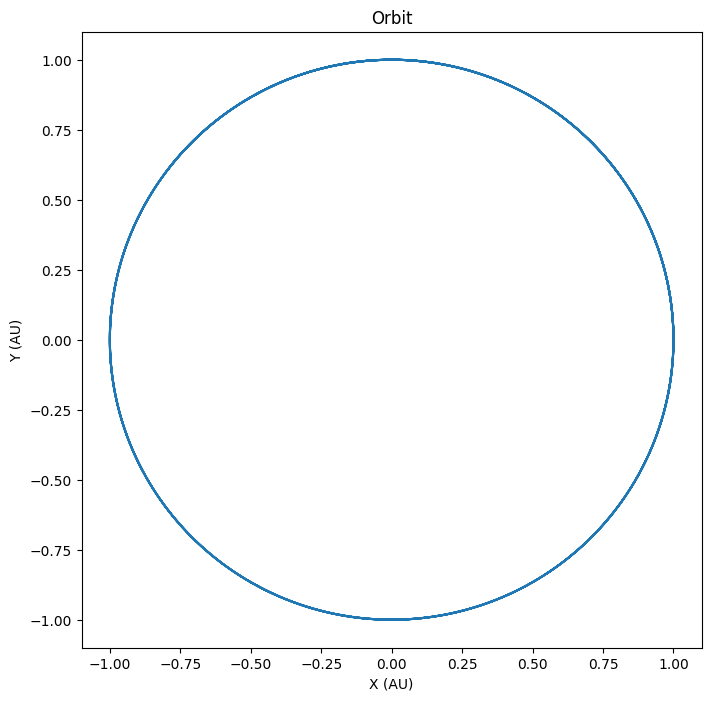

In [10]:
# Aphelion and eccentricity
r_ap = 1.0
e = 0.0

# Semi-major axis
sma = r_ap/(1 + e)

# Circular velocity
vCirc = np.sqrt(np.abs(-np.log(1 + sma)/sma + 1/(1 + sma)))

# Define intiial conditions
ixp = r_ap
iyp = 0
izp = 0
ivx = 0
ivy = vCirc*np.sqrt((1 - e)/(1 + e))
ivz = 0

# Pack the inital conditions into a dictionary
initial_conditions = {'ixp':  ixp, 
                      'iyp':  iyp, 
                      'izp':  izp, 
                      'ivx':  ivx, 
                      'ivy':  ivy, 
                      'ivz':  ivz, 
                        'e':  e}

#Compute the relative errors in the energies
orbit = findPos(1e-3, m, initial_conditions)
x = orbit['x']
y = orbit['y']
z = orbit['z']
vx = orbit['vx']
vy = orbit['vy']
vz = orbit['vz']

# Plot the oribt
plt.figure(figsize = (8, 8))
plt.plot(x, y)
plt.ylabel('Y (AU)')
plt.xlabel('X (AU)')
plt.title("Orbit")
plt.show()

### Problem 2:  Eccentricity 0.5, use KDK, aphelion position r=1, and timestep dt=1e-3. Run for 10 periods, plot the energy.

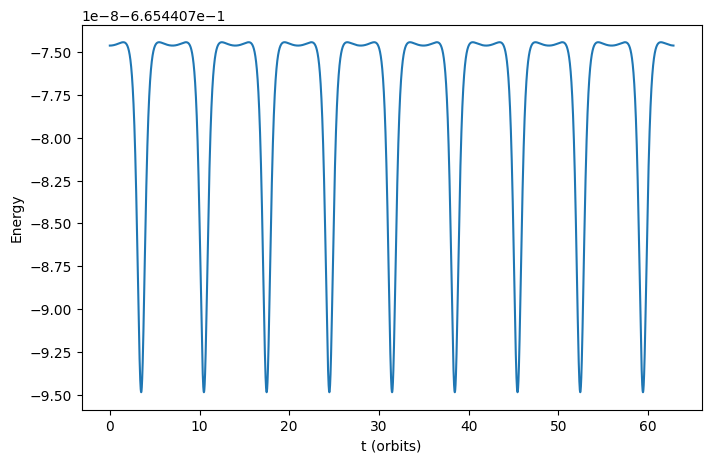

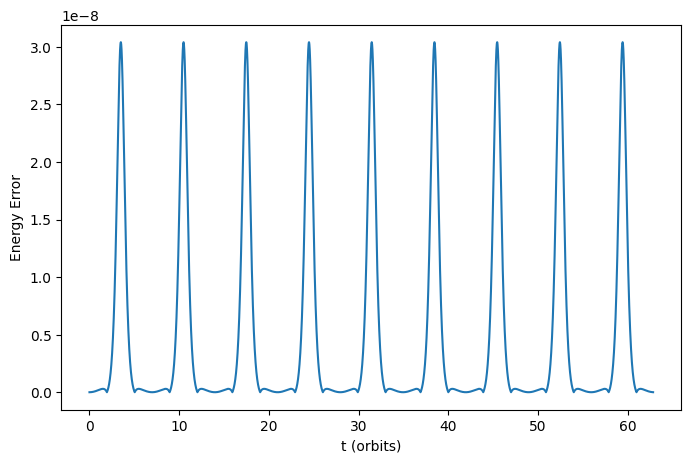

In [11]:
# Aphelion and eccentricity
r_ap = 1.0
e = 0.5

# Semi-major axis
sma = r_ap/(1 + e)

# Circular velocity
vCirc = np.sqrt(np.abs(-np.log(1 + sma)/sma + 1/(1 + sma)))

# Define intiial conditions
ixp = r_ap
iyp = 0
izp = 0
ivx = 0
ivy = vCirc*np.sqrt((1 - e)/(1 + e))
ivz = 0

# Pack the inital conditions into a dictionary
initial_conditions = {'ixp':  ixp, 
                      'iyp':  iyp, 
                      'izp':  izp, 
                      'ivx':  ivx, 
                      'ivy':  ivy, 
                      'ivz':  ivz, 
                        'e':  e}

# Compute the relative errors in the energies
orbit = findPos(1e-3, m, initial_conditions)
t = orbit['t']
x = orbit['x']
y = orbit['y']
z = orbit['z']
vx = orbit['vx']
vy = orbit['vy']
vz = orbit['vz']

# Make r and v
r = np.sqrt(x**2 + y**2 + z**2)
v = np.sqrt(vx**2 + vy**2 + vz**2)

# Energy
E = 0.5*v**2 - np.log(1+r)/r

# Energy error 
sig_E = np.abs((E - E[0])/E[0])

# Plot the oribt
plt.figure(figsize = (8, 5))
plt.plot(t, E)
plt.ylabel('Energy')
plt.xlabel('t (orbits)')

# Plot the relative error in the energy
plt.figure(figsize = (8, 5))
plt.plot(t, sig_E)
plt.ylabel('Energy Error')
plt.xlabel('t (orbits)')
plt.show()

### Problem 3:  Measure the radial period and the precession rate, against the analytical estimate (solve the integrals numerically).

Just as a note, I tried performing the integrals for radial period and precession rate, but the radial period came out roughly a factor of 10 off so I'm positive I'm not doing it right.  The integral for precession I tried as well but it doesn't appear to be correct.  I'll come to office hours this week to discuss. 

<ipython-input-12-e60b55c6790a>:73: RuntimeWarning: invalid value encountered in sqrt
  integrand_tr = 2/np.sqrt(tmp)
/usr/local/lib/python3.9/dist-packages/matplotlib/axes/_base.py:2503: UserWarning: Warning: converting a masked element to nan.
  xys = np.asarray(xys)


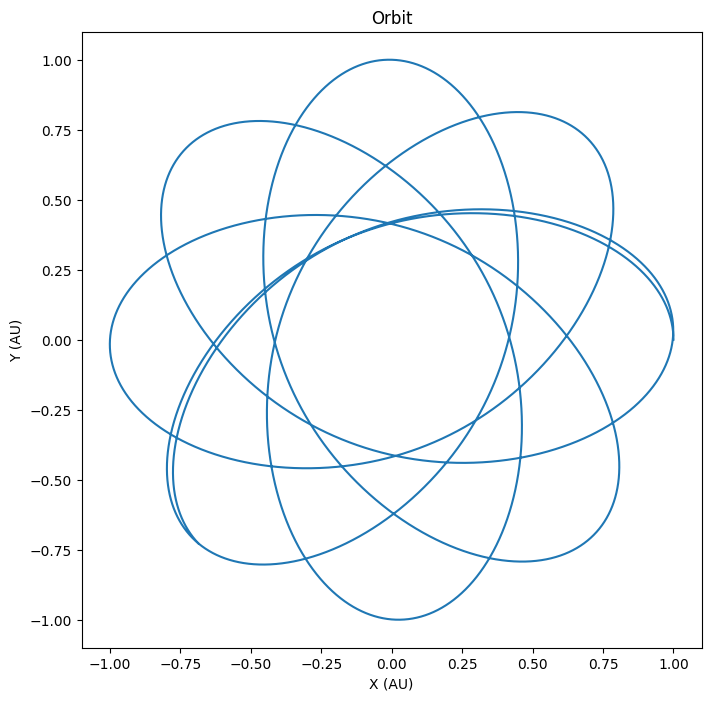

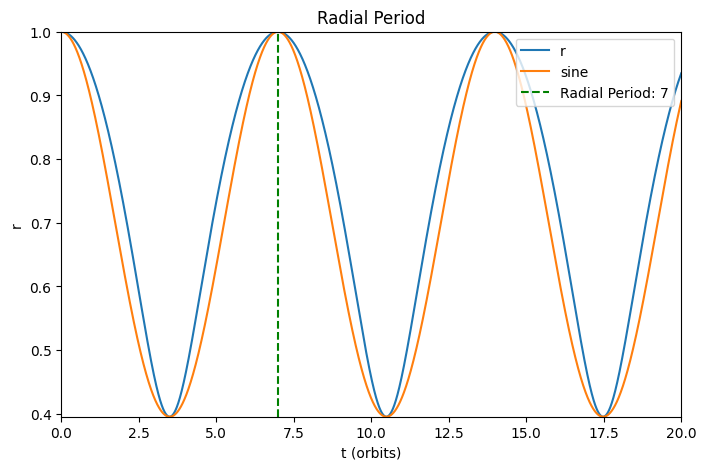

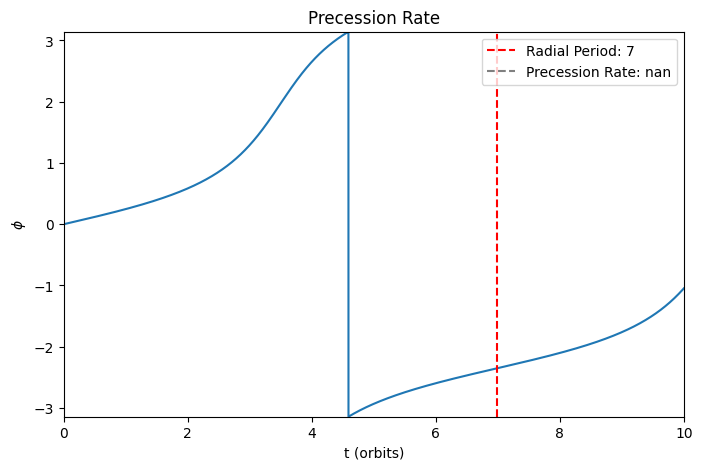

In [12]:
# Aphelion and eccentricity
r_ap = 1.0
e = 0.5

# Semi-major axis
sma = r_ap/(1 + e)

# Circular velocity
vCirc = np.sqrt(np.abs(-np.log(1 + sma)/sma + 1/(1 + sma)))

# Define intiial conditions
ixp = r_ap
iyp = 0
izp = 0
ivx = 0
ivy = vCirc*np.sqrt((1 - e)/(1 + e))
ivz = 0

# Pack the inital conditions into a dictionary
initial_conditions = {'ixp':  ixp, 
                      'iyp':  iyp, 
                      'izp':  izp, 
                      'ivx':  ivx, 
                      'ivy':  ivy, 
                      'ivz':  ivz, 
                        'e':  e}

# Compute the orbit
orbit = findPos(1e-3, m, initial_conditions)

# Pull the time and positions
t = orbit['t']
x = orbit['x']
y = orbit['y']
z = orbit['z']

# Pull velocity components
vx = orbit['vx']
vy = orbit['vy']
vz = orbit['vz']

# Make r and v
r = np.sqrt(x**2 + y**2 + z**2)
v = np.sqrt(vx**2 + vy**2 + vz**2)

# Convert to polar coordinates
phi = np.arctan2(y, x)
vrad =  vx*np.cos(phi) + vy*np.sin(phi)
vphi = -vx*np.sin(phi) + vy*np.cos(phi)
phidot = vphi/r

# Compute angualr momentum and energy
L = np.mean(r**2*phidot)
EE = np.mean((1/2)*v**2 - np.log(1+r)/r)

# Define bounds
r_min = min(r)
r_max = max(r)

# Calculate the radial period
T = quad(radial_period, r_min, r_max, args = (EE, L))[0]

# Calculate the analytic estimate
A = (r_max - r_min)/2
r_est = A*np.cos(2*np.pi*t/T) + (1 - A)

# Calculate precession rate
nr = 100
rr = np.linspace(r_min, r_max, nr)
dr = np.gradient(rr)
Phi = -np.log(1+rr)/rr
tmp = 2*(EE-Phi) - L**2/rr**2
integrand_tr = 2/np.sqrt(tmp)
integrand_dphi = integrand_tr * L/rr**2
P = np.trapz(integrand_dphi*dr)

# Plot the oribt
plt.figure(figsize = (8, 8))
plt.plot(x, y)
plt.ylabel('Y (AU)')
plt.xlabel('X (AU)')
plt.title("Orbit")

# Plot the oribt
plt.figure(figsize = (8, 5))
plt.plot(t, r, label = 'r')
plt.plot(t, r_est, label = 'sine')
plt.vlines(T, min(r), max(r), color = 'green', linestyles = 'dashed', label = f'Radial Period: {T:.0f}')
plt.xlim(0, 20)
plt.ylim(min(r), max(r))
plt.ylabel('r')
plt.xlabel('t (orbits)')
plt.title("Radial Period")
plt.legend(loc = 'best')

# Plot the oribt
plt.figure(figsize = (8, 5))
plt.plot(t, phi)
plt.vlines(T, min(phi), max(phi), color = 'red', linestyles = 'dashed', label = f'Radial Period: {T:.0f}')
plt.hlines(P, 0, 10, color = 'gray', linestyles = 'dashed', label = f'Precession Rate: {P:.2f}')
plt.xlim(0, 10)
plt.ylim(min(phi), max(phi))
plt.ylabel(r'$\phi$')
plt.xlabel('t (orbits)')
plt.title("Precession Rate")
plt.legend(loc = 'best')